## **Mount implementation folder in google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/FYP/Implementation/data
! ls

/content/drive/.shortcut-targets-by-id/1MkC_V0CRXkQ-OsCBxF38m1Sku4w4s3TR/FYP/Implementation/data
ann_backdoors.pkl	preprocessing.csv	  UNSW-NB15_1.csv
encoded-data.csv	preprosessing-dos.csv	  UNSW-NB15_2.csv
knn_worms.pkl		selected_columns_all.csv  UNSW-NB15_3.csv
NUSW-NB15_features.csv	SVR-predict-data.csv	  UNSW-NB15_4.csv
OTset.csv		testset.csv


## **Load balanced training datset for DOS attacks**

Data = (x_train_DoS_normalized, y_train)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle

#get select columns for training
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)
columns=list(select_col['DoS'])

#create training dataset down sampling
df = pd.read_csv('encoded-data.csv', sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']


DoS_attacks = df[df['DoS'] == 1]
Normal_Data = df[df['Label'] == 0]
frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=attack_labels, axis=1)
Y=result[['DoS']]
X.head()

undersample = RandomUnderSampler(random_state=0)
# fit and apply the transform
X, Y = undersample.fit_resample(X,Y)


x_train,y_train  = shuffle(X[columns],Y)


X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 




array([[7.12490750e-05, 1.22843233e-05, 7.61628043e-05, ...,
        3.73954455e-01, 4.06996828e-01, 9.82745861e-06],
       [0.00000000e+00, 2.25000009e-08, 9.52500038e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.50000006e-08],
       [0.00000000e+00, 7.50000000e-08, 3.17500000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 1.25000000e-08],
       ...,
       [6.58623411e-05, 1.13555760e-05, 7.04045715e-05, ...,
        9.25279590e-01, 2.36709254e-01, 6.81334563e-06],
       [0.00000000e+00, 6.00000000e-08, 2.54000000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-08],
       [2.45786634e-05, 4.23770059e-06, 2.62737437e-05, ...,
        2.23161551e-01, 7.11933700e-02, 8.47540119e-07]])

## **Create Test Set for DOS attacks**

Data = (x_test_DOS_normalized, y_test)

In [ ]:
import pandas as pd
import numpy as np
select_col=pd.read_csv("selected_columns_all.csv", sep=',', on_bad_lines='skip', index_col=False)

columns=list(select_col['DoS'])
col = ['dttl','state','sttl','proto','swin','ct_dst_sport_ltm','srcip', 'dstip','smeansz','sbytes','Sload','ct_state_ttl','dsport','sport','ct_dst_ltm']
test_data =pd.read_csv("testset.csv", sep=',', on_bad_lines='skip', index_col=False)
attack_labels = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] + ['attack_cat','Label']
attack_categories = ['Analysis', 'Backdoors', 'DoS', 'Exploits', 'Fuzzers', 'Generic', 'Reconnaissance', 'Shellcode', 'Worms'] 

DoS_attacks = test_data[test_data['attack_cat'] == 'DoS']
# print(DoS_attacks.shape)
Normal_Data = test_data[test_data['Label'] == 0]
# print(Normal_Data.shape)

frames = [DoS_attacks, Normal_Data]
result = pd.concat(frames)
X=result.drop(labels=['attack_cat', 'Label'], axis=1)
Y=result[['Label']]
X.head()

x_test,y_test  = shuffle(X[col],Y)

x_test = x_test.replace('-','')
x_test = x_test.replace(r'^\s*$', np.nan, regex=True)

#delete raws with missing values
for i in x_test.columns.values.tolist():
  i = x_test.loc[x_test[i].isnull()].index
  x_test = x_test.drop(index=list(i))
  y_test = y_test.drop(index=list(i))

percent_missing = x_test.isnull().sum()
missing_value_df = pd.DataFrame({'column_name': x_test.columns, 'count_missing': percent_missing, 'To be dropped': (percent_missing > 45)})
# print(missing_value_df)

x_test.head()
#encode the data
from sklearn.preprocessing import LabelEncoder

# replace hex with int
x_test['sport'] = x_test['sport'].astype(str).apply(int, base=16)
x_test['dsport'] = x_test['dsport'].astype(str).apply(int, base=16)

# #Create an instance of Label-encoder
labelencoder = LabelEncoder() 

# # encode columns consists with strings
x_test['srcip'] = labelencoder.fit_transform(x_test['srcip'])
x_test['dstip'] = labelencoder.fit_transform(x_test['dstip'])
x_test['proto'] = labelencoder.fit_transform(x_test['proto'])
x_test['state'] = labelencoder.fit_transform(x_test['state'])

X_test_DoS_normalized = preprocessing.normalize(x_test) 


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


**Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pandas as pd

# df=pd.read_csv('filtered-data.csv')
# X=df.drop(labels=['Label'], axis=1)
# # X=df.drop(labels=['attack_cat','Label'], axis=1)
# # Y=df[['attack_cat','Label']]
# Y=df[['Label']]

# # split the dataset
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
X_train_DoS_normalized = preprocessing.normalize(x_train)
X_train_DoS_normalized 
# X_train_normalized = preprocessing.normalize(X_train)
# X_test_normalized = preprocessing.normalize(X_test)

array([[7.12490750e-05, 1.22843233e-05, 7.61628043e-05, ...,
        3.73954455e-01, 4.06996828e-01, 9.82745861e-06],
       [0.00000000e+00, 2.25000009e-08, 9.52500038e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.50000006e-08],
       [0.00000000e+00, 7.50000000e-08, 3.17500000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 1.25000000e-08],
       ...,
       [6.58623411e-05, 1.13555760e-05, 7.04045715e-05, ...,
        9.25279590e-01, 2.36709254e-01, 6.81334563e-06],
       [0.00000000e+00, 6.00000000e-08, 2.54000000e-06, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e-08],
       [2.45786634e-05, 4.23770059e-06, 2.62737437e-05, ...,
        2.23161551e-01, 7.11933700e-02, 8.47540119e-07]])

## **Model Training**

In [ ]:
# no of features
n_features = np.shape(X_train_DoS_normalized)[1]
n_features

15

In [ ]:
from sklearn.neural_network import MLPClassifier

x = np.array(X_train_DoS_normalized)
y = np.array(y_train,).ravel()

#Initializing the MLPClassifier
MLPClassifier = MLPClassifier(hidden_layer_sizes=(30, 20, 10, 5, 2), max_iter=300,activation = 'relu',solver='adam',random_state=1, verbose = 0)

#Fitting the training data to the network
clf = MLPClassifier.fit(x, y)

In [ ]:
# save trained model
from joblib import Parallel, delayed
import joblib
  
# Save the model as a pickle in a file
joblib.dump(clf, 'ann_dos.pkl')

['ann_dos.pkl']

Accuracy score for train set: 0.8618881118881119


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


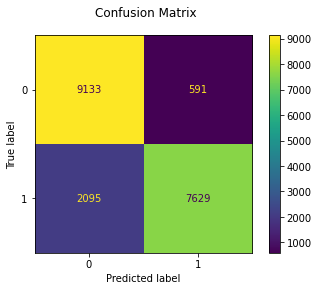

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

print(f"Accuracy score for train set: {clf.score(x, y)}")
fig=plot_confusion_matrix(clf, x, y)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

Accuracy score: 0.9379983890455095


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


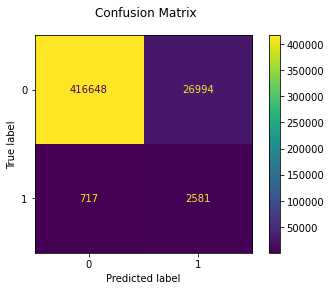

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)

print(f"Accuracy score: {clf.score(x_test_array, y_test_array)}")
fig=plot_confusion_matrix(clf, x_test_array, y_test_array)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

## **Model Testing: Accuracy**

maximum_test_accuracy:  0.993303, optimal_threshold:  0.900000


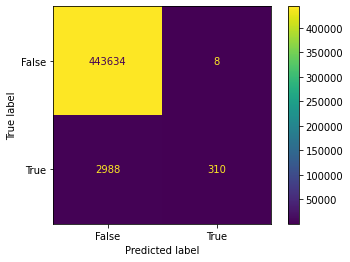

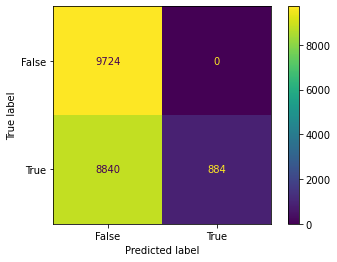

maximum_train_accuracy:  0.545455, optimal_threshold:  0.900000


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

#getting probabilities of class 1
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
prob_test_all=clf.predict_proba(x_test_array)
prob_test = prob_test_all[:, 1]

x_train_array = np.array(X_train_DoS_normalized)
y_train_array = np.array(y_train)
prob_train_all=clf.predict_proba(x_train_array)
prob_train = prob_train_all[:, 1]

optimal_threshold = 0
maximum_accuracy = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_test = [1 if p > threshold else 0 for p in prob_test]
  accuracy = accuracy_score(y_test_array, y_predict_class_test)
  # print(f"accuracy: {accuracy: .6f}, threshold: {threshold: .6f}")
  if maximum_accuracy < accuracy:
    maximum_accuracy = accuracy
    optimal_threshold = threshold
    opt_y_test = y_predict_class_test 
print(f"maximum_test_accuracy: {maximum_accuracy: .6f}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test_array, y_predict_class_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

y_predict_class_train = [1 if p > optimal_threshold else 0 for p in prob_train]
accuracy = accuracy_score(y_train_array, y_predict_class_train)
confusion_matrix = metrics.confusion_matrix(y_train_array, y_predict_class_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

print(f"maximum_train_accuracy: {accuracy: .6f}, optimal_threshold: {optimal_threshold: .6f}")

## **Model Testing: F1 Score**

maximum_test_f1_score: 0.3948630666872969, accuracy: 0.9824987694097642, optimal_threshold:  0.860000


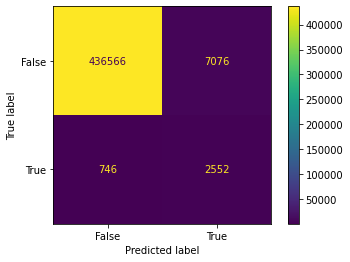

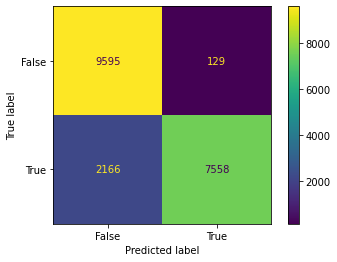

maximum_train_f1_score: 0.8681867784733789, accuracy: 0.881993006993007, optimal_threshold:  0.860000


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import joblib
  
# Load the model from the file
ann_clf = joblib.load('ann_dos.pkl')

#getting probabilities of class 1
x_test_array = np.array(X_test_DoS_normalized)
y_test_array = np.array(y_test)
prob_test_all=ann_clf.predict_proba(x_test_array)
prob_test = prob_test_all[:, 1]

x_train_array = np.array(X_train_DoS_normalized)
y_train_array = np.array(y_train)
prob_train_all=ann_clf.predict_proba(x_train_array)
prob_train = prob_train_all[:, 1]

optimal_threshold = 0
maximum_f1 = 0

for i in range(1,100):
  threshold = i/100
  y_predict_class_test = [1 if p > threshold else 0 for p in prob_test]
  f1 = f1_score(y_test_array, y_predict_class_test)
  if maximum_f1 < f1:
    maximum_f1 = f1
    optimal_threshold = threshold
    opt_y_test = y_predict_class_test 

accuracy = accuracy_score(y_test_array, opt_y_test)
print(f"maximum_test_f1_score: {maximum_f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")
confusion_matrix = metrics.confusion_matrix(y_test_array, opt_y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

y_predict_class_train = [1 if p > optimal_threshold else 0 for p in prob_train]
f1 = f1_score(y_train_array, y_predict_class_train)
accuracy = accuracy_score(y_train_array, y_predict_class_train)
confusion_matrix = metrics.confusion_matrix(y_train_array, y_predict_class_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show() 

print(f"maximum_train_f1_score: {f1}, accuracy: {accuracy}, optimal_threshold: {optimal_threshold: .6f}")